

*   NAMA : LA LIANI
*   PROGRAM : FTDS18-rmt
*   projek  : GC1







*   A. Pendahuluan

Kovid-19 adalah wabah penyakit yang melanda dunia dipenghujung tahun 2019 yang kemudian oleh WHO dinyakan sebagai pandemi. hampir semua negara di dunia terjangkiti wabah penyakit ini. selain berbahya, penyakit ini memiliki laju sebarannya atau penularanya yang sangat tinggi sehingga menyebakan kasus terkonfirmasi, dan kasus kematian juga tinggi. Namun kasus sembuh juga banyak jika dilihat dari tabel di bawah ini.

Jika kita lihat tabel di bawah ini tentu kita akan kesulitan memahami bagaimana perkembangan kasusnya setiap hari di beberapa negara jika dilihat dari kasus terkonfirmasi, kasus kematian dan kasus sembuh. Untuk itu, kita perlu kelompokan beberapa bagian data dan membuang beberapa kolom data yang tidak akan kita gunakan untuk menganalisis data tersebut karena data tersebut kurang relate  atau tidak berhubungan dengan apa yang akan kita lakukan dengan data tersebut. Dengan demikian, proses olah data itu menjadi bentuk yang lebih sederhana dan mudah dipahami buat siapa saja yang melihatnya adalah menjadi penting. 

Oleh karena itu, langkah langkah yang akan dilakukan terhadap data tersebut adalah sebagai berikut: 1. membuang data kolom yang tidak diperlukan sebagai kebutuhan analisis nantinya. 2 menjadikan data "country_region" sebagai index baris untuk memudahkan melihat tren waktu terjadinya kasus terkonfirmasi, kasus kematian dan kasus sembuh.3 membuang kolom data yang banyak missing value. 4. menganalisis data dilihat dari angka tertinggi dar kasus "confirmed" dan "deaths.

ada beberapa langkah query yang bisa kita gunakan untuk memproses data sebelum di load atau diimpor ke notebook baik jupyter notebook atau google colab. Namun saya memilih untuk mengimpor bentuk utuh dari data dan hanya melakukan query dasar berikut ini:

SELECT * FROM `bigquery-public-data.covid19_jhu_csse_eu.summary` LIMIT 1000




*   b. data cleaning 

Data cleaning adalah proses membersihkan data atau  melihat data mana yang tidak diperlukan untuk keperluan analisis. Cleaning data bisa meliputi membuang data yang missing valua atau mengganti dengan data yang baru dengan beberapa pertimbangan menggunakan teknik cleaning data tertentu.






Proses cleaning data membutuhkan library tersendiri dan kali ini kita menggunakan  library python yakni pandas. Berikut ini cara mengimpor library pandas. jika belum memiliki library pandas maka peerlu menginstalnya terlebih dahulu dengan command berikut:
!pip install pandas | jika diinstal lewat jupyter notebook atau colab.  
pip install pandas | jika diinstall lewat terminal anaconda atau command propmt
 Untuk yang menggunakan vscode install python lewat extension dari vs code dan kemudian install pandas dengan salah satu cara diatas.

In [ ]:
# import libary yang akan digunakan untuk data cleaning dan data analisis, misal visualisasi data 
# library yang digunakan menurut petunjuk soal adalah pandas
import pandas as pd 

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/h8dsft_P0GC1_LA-LIANI/h8dsft_P0GC1_LA-LIANI.csv")
data.head() # fungsi head() untuk melihat list  5 data pertama

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,Rhode Island,US,2021-08-01,41.710181,-71.286523,POINT(-71.28652315 41.71018079),5236,146,NaN,NaN,44001.0,Bristol,"Bristol, Rhode Island, US"
1,Rhode Island,US,2021-08-01,41.671063,-71.576416,POINT(-71.57641596 41.67106337),19040,367,NaN,NaN,44003.0,Kent,"Kent, Rhode Island, US"
2,Rhode Island,US,2021-08-01,41.564203,-71.265698,POINT(-71.26569799 41.5642026),7058,42,NaN,NaN,44005.0,Newport,"Newport, Rhode Island, US"
3,Rhode Island,US,2021-08-01,41.870647,-71.577535,POINT(-71.57753536 41.87064746),100231,2005,NaN,NaN,44007.0,Providence,"Providence, Rhode Island, US"
4,Rhode Island,US,2021-08-01,NaN,NaN,NaN,12501,9,NaN,NaN,90044.0,Unassigned,"Unassigned, Rhode Island, US"


In [ ]:
data.tail() # tail() untuk melihat list 5 terakhir data

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
995,Beijing,China,2022-01-13,40.1824,116.4142,POINT(116.4142 40.1824),1223,9,NaN,NaN,NaN,NaN,"Beijing, China"
996,Chongqing,China,2022-01-13,30.0572,107.8740,POINT(107.874 30.0572),611,6,NaN,NaN,NaN,NaN,"Chongqing, China"
997,Fujian,China,2022-01-13,26.0789,117.9874,POINT(117.9874 26.0789),1437,1,NaN,NaN,NaN,NaN,"Fujian, China"
998,Gansu,China,2022-01-13,35.7518,104.2861,POINT(104.2861 35.7518),356,2,NaN,NaN,NaN,NaN,"Gansu, China"
999,Guangdong,China,2022-01-13,23.3417,113.4244,POINT(113.4244 23.3417),3612,8,NaN,NaN,NaN,NaN,"Guangdong, China"


In [ ]:
new_data = data.copy() # data dikopi untuk menghindari 
                      #jika terjadi kesalahan cleaning data yang menyebabkan data asli menjadi berubah. 
                      # selain itu, kita bisa mengatur parameter saat mengekstrak data 
                      # yakni parameter "inplace = false" yang menjadi defaut fungsi ekstraksi.

In [ ]:
new_data.head() # ini data yang akan digunakan untuk preses selanjutnya

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,Rhode Island,US,2021-08-01,41.710181,-71.286523,POINT(-71.28652315 41.71018079),5236,146,NaN,NaN,44001.0,Bristol,"Bristol, Rhode Island, US"
1,Rhode Island,US,2021-08-01,41.671063,-71.576416,POINT(-71.57641596 41.67106337),19040,367,NaN,NaN,44003.0,Kent,"Kent, Rhode Island, US"
2,Rhode Island,US,2021-08-01,41.564203,-71.265698,POINT(-71.26569799 41.5642026),7058,42,NaN,NaN,44005.0,Newport,"Newport, Rhode Island, US"
3,Rhode Island,US,2021-08-01,41.870647,-71.577535,POINT(-71.57753536 41.87064746),100231,2005,NaN,NaN,44007.0,Providence,"Providence, Rhode Island, US"
4,Rhode Island,US,2021-08-01,NaN,NaN,NaN,12501,9,NaN,NaN,90044.0,Unassigned,"Unassigned, Rhode Island, US"


In [ ]:
new_data.info(verbose= True, show_counts= True) # untuk melihat info dari data misal type data missing value dari data
                                             # varbose : parameter untuk menampilkan hasil secara keseluruhan
                                            # show_counts : menampilkan kolom  yang mising value dan tidak mising value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  958 non-null    object 
 1   country_region  1000 non-null   object 
 2   date            1000 non-null   object 
 3   latitude        981 non-null    float64
 4   longitude       981 non-null    float64
 5   location_geom   981 non-null    object 
 6   confirmed       1000 non-null   int64  
 7   deaths          1000 non-null   int64  
 8   recovered       54 non-null     float64
 9   active          54 non-null     float64
 10  fips            823 non-null    float64
 11  admin2          828 non-null    object 
 12  combined_key    1000 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 101.7+ KB


In [ ]:

data_nul = new_data.isnull().sum() # untuk melihat jumlah data yang missing value atau data Null pada masing masing kolom
data_nul

province_state     42
country_region      0
date                0
latitude           19
longitude          19
location_geom      19
confirmed           0
deaths              0
recovered         946
active            946
fips              177
admin2            172
combined_key        0
dtype: int64

In [ ]:
new_data["date"].unique() # dapat diketahui bahwa data yang diambil itu hanya tanggal 2021-08-01 dan 2022-01-13                       

array(['2021-08-01', '2022-01-13'], dtype=object)

In [ ]:
new_data["date"].value_counts() # dapat diketahui bahwa kasus "confirmed", kasus "deaths", dan "recovered" 
                                  # tercatat 883 kasus pada tanggal 2021-08-01 dan tercatat 117 kasus pada 2022-01-13 di beberapa negara
 

2021-08-01    883
2022-01-13    117
Name: date, dtype: int64

In [ ]:
# untuk menghitung berapa banyak nama negara yang tercetak berulang pada kolom "country_region" 
new_data["country_region"].value_counts() 


US                          829
Ukraine                      27
Brazil                       27
Chile                        17
United Kingdom               16
Canada                       16
Belgium                      12
Australia                     8
China                         6
Vietnam                       1
Burkina Faso                  1
Benin                         1
Bhutan                        1
Bolivia                       1
Bosnia and Herzegovina        1
Botswana                      1
Uzbekistan                    1
Brunei                        1
Bulgaria                      1
Burma                         1
West Bank and Gaza            1
Burundi                       1
Cabo Verde                    1
Cambodia                      1
Cameroon                      1
Uruguay                       1
Central African Republic      1
Chad                          1
United Arab Emirates          1
Belize                        1
Vanuatu                       1
Belarus 



C. Data ekstaksi untuk menguraikan bagian bagian data dibuat lebih sederhana menjadi bentuk data yang mudah dipahami. Pada tahap ini dilakukan beberapa proses seperti membuang beberapa kolom yang tidak akan dipakai untuk tahap selanjutnya atau karena terpaksa dibuang karena missing value dati kolom data tersebut hampir semuanya adalah missing value. berikut ini beberapakolom yang dibuang misal kolom "admin", "flips" dan beberapa kolom yang lain.
 



In [ ]:
# beberapa kolom didrop karna tidak akan digunakan dalam proses selanjutnya
new_data.drop(columns=["active", "fips", "admin2", "combined_key","location_geom"], axis = 1, inplace = True)
                                              

In [ ]:
new_data

,province_state,country_region,date,latitude,longitude,confirmed,deaths,recovered
0,Rhode Island,US,2021-08-01,41.710181,-71.286523,5236,146,NaN
1,Rhode Island,US,2021-08-01,41.671063,-71.576416,19040,367,NaN
2,Rhode Island,US,2021-08-01,41.564203,-71.265698,7058,42,NaN
3,Rhode Island,US,2021-08-01,41.870647,-71.577535,100231,2005,NaN
4,Rhode Island,US,2021-08-01,NaN,NaN,12501,9,NaN
...,...,...,...,...,...,...,...,...
995,Beijing,China,2022-01-13,40.182400,116.414200,1223,9,NaN
996,Chongqing,China,2022-01-13,30.057200,107.874000,611,6,NaN
997,Fujian,China,2022-01-13,26.078900,117.987400,1437,1,NaN
998,Gansu,China,2022-01-13,35.751800,104.286100,356,2,NaN


In [ ]:
# karena pada kolom "confirmed" hampir semua barisnya adalah missing value maka akan dibuang sekaligus dengan kolom latitude dan longitude
# kolom "province_state" tidak dibuang karena untuk mengetahui bahwa nama negara yang berulang karena banyaknya kasus 
# terkonfirmasi dan kasus kematian pada beberapa kota di kolom "povince_state" dalam satu negara pada tanggal 2021-08-01 dan 2022-01-13
new_data.drop(columns=["recovered","latitude", "longitude"], axis = 1, inplace = True)
                                              

In [ ]:
new_data

,province_state,country_region,date,confirmed,deaths
0,Rhode Island,US,2021-08-01,5236,146
1,Rhode Island,US,2021-08-01,19040,367
2,Rhode Island,US,2021-08-01,7058,42
3,Rhode Island,US,2021-08-01,100231,2005
4,Rhode Island,US,2021-08-01,12501,9
...,...,...,...,...,...
995,Beijing,China,2022-01-13,1223,9
996,Chongqing,China,2022-01-13,611,6
997,Fujian,China,2022-01-13,1437,1
998,Gansu,China,2022-01-13,356,2


In [ ]:
# untuk memudahkan memahami tabel data tersebut, maka data pada tabel perlu dikelompokan.
# kasus "confirmed" dan "deaths" pada masing masing negara di kolom "country_regiaon" dijumlahkan sehingga tampilan tabel menjadi lebih sederhana dengan
# kolom "country_region " sebagai indexnya. namun belum diketahui kasus tersebut terjadi pada tanggal berapa karna ada 2 tanggal kejadian 
# yakni pada tanggal 2021-08-01 dan 2022-01-13   
new_data.groupby(['country_region'])[['confirmed', 'deaths']].sum()


,confirmed,deaths
country_region,,
Afghanistan,158602,7376
Albania,226598,3255
Algeria,224383,6383
Andorra,28899,141
Angola,92581,1847
Antigua and Barbuda,5214,120
Argentina,6793119,117808
Armenia,346811,8014
Australia,1526961,2572


In [ ]:
# solusinya adalah data akan dikelompokan menjadi 2 tabel berdasarkan tanggal kejadian yakni 2021-08-01 dan 2022-01-13. 
# setelah itu data kasus pada kolom "confirmed" dan "deaths" dijumlahkan untuk setiap negara dan hasilnya seperti 2 tabel dibawah ini. 
new_data1 =new_data.where(new_data['date'] == "2021-08-01").groupby(['country_region'])[['confirmed', 'deaths']].sum() 
new_data1

,confirmed,deaths
country_region,,
US,7481236.0,113123.0
Uganda,94195.0,2696.0
Ukraine,2334433.0,55577.0
United Arab Emirates,682377.0,1951.0
United Kingdom,5907594.0,130014.0
Uruguay,381569.0,5966.0
Uzbekistan,130216.0,880.0
Vanuatu,4.0,1.0
Venezuela,306673.0,3607.0


In [ ]:
# mencari total data keseluruhan pada new_data1
total_data = new_data1[["confirmed", "deaths"]].sum() # mencari jumlah data keseluruhan

In [ ]:
# mencari persentasi dari data "confirmed" dan "deaths" dari setiap negara pada new_data1
persentasi = new_data1[["confirmed", "deaths"]]/total_data # menghitung presentasi data setiap negara
persentasi = persentasi*100
persentasi

,confirmed,deaths
country_region,,
US,41.320071,34.584565
Uganda,0.520254,0.824235
Ukraine,12.893449,16.991296
United Arab Emirates,3.768878,0.596470
United Kingdom,32.628593,39.748571
Uruguay,2.107467,1.823957
Uzbekistan,0.719204,0.269038
Vanuatu,0.000022,0.000306
Venezuela,1.693804,1.102751


In [ ]:
 # tabel hasil akumulasi atau jumlah dari kolom "confirmed" dan "deaths" pada tanggal 2022-01-13
new_data2 =new_data.where(new_data['date'] == "2022-01-13").groupby(['country_region'])[['confirmed', 'deaths']].sum()
new_data2

,confirmed,deaths
country_region,,
Afghanistan,158602.0,7376.0
Albania,226598.0,3255.0
Algeria,224383.0,6383.0
Andorra,28899.0,141.0
Angola,92581.0,1847.0
Antigua and Barbuda,5214.0,120.0
Argentina,6793119.0,117808.0
Armenia,346811.0,8014.0
Australia,1526961.0,2572.0


In [ ]:
# mencari total data keseluruhan pada new_data2
total_data2 = new_data2[["confirmed", "deaths"]].sum()
total_data2

confirmed    46865971.0
deaths        1020539.0
dtype: float64

In [ ]:
persentasi2 = new_data2[["confirmed", "deaths"]]/total_data2 # menghitung presentasi data setiap negara
persentasi2 = persentasi2*100
persentasi2

,confirmed,deaths
country_region,,
Afghanistan,0.338416,0.722755
Albania,0.483502,0.318949
Algeria,0.478776,0.625454
Andorra,0.061663,0.013816
Angola,0.197544,0.180983
Antigua and Barbuda,0.011125,0.011758
Argentina,14.494779,11.543704
Armenia,0.740006,0.785271
Australia,3.258144,0.252024




*   D. analisis data menggunakan analisis statistik deskriptif



In [ ]:
new_data1.describe() # describe() # untuk melihat gambaran deskriptif dari data misal rata rata, nilai minimum dan maksimum
                    # dari setiap kolom dari data yang bersifat numerik.

,confirmed,deaths
count,1.400000e+01,14.000000
mean,1.293255e+06,23363.642857
std,2.382789e+06,44070.486441
min,4.000000e+00,1.000000
25%,1.147135e+05,1520.500000
50%,2.514830e+05,3494.500000
75%,6.071750e+05,5376.250000
max,7.481236e+06,130014.000000


In [ ]:
new_data2.describe()# describe() # untuk melihat gambaran deskriptif dari data misal rata rata, nilai minimum dan maksimum
                    # dari setiap kolom dari data yang bersifat numerik

,confirmed,deaths
count,3.700000e+01,37.000000
mean,1.266648e+06,27582.135135
std,3.849791e+06,102439.071704
min,2.873000e+03,3.000000
25%,2.990800e+04,269.000000
50%,2.243830e+05,2572.000000
75%,7.117230e+05,13898.000000
max,2.282218e+07,620830.000000




*   E. visualisasi data 



In [ ]:
# membuat index terlebih dahulu karena jika di akses melalui new_data1["country_region"] tidak bisa karena saat ini country_region bukan lagi kolom
index = ["US","Uganda", "Ukreine", "UAS", "UK", "Uruguay", "uzbeskistan", "vanuatu", "venezuela", "vietnam", "WBG", "yemen","Zambia","zimbabwe"]

In [ ]:
# langka untuk membuat plot dengan menggunakan data "persentasi"
Confirmed = persentasi["confirmed"]
Deaths = persentasi["deaths"]
index = index
df = pd.DataFrame({'Confirmed(%)': persentasi["confirmed"],
                   'Deaths(%)': persentasi["deaths"]}, index=index)


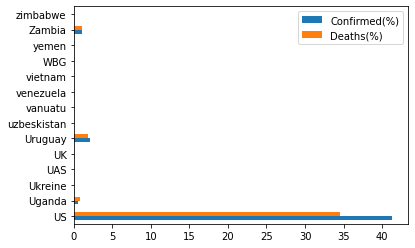

In [ ]:
# bar pada data persentasi yang menggunakan data new_data1
bar1 = df.plot.barh()

In [ ]:
# membuat list seperti yang dilakukan sebelumnya pada data "new_data1"
index2 = ["Afghanistan","Albania", "Algeria", "Andorra", "Angola", "AB", "Argentina", "Armenia", "Australia", "Austria", "Azerbaijan", "Bahamas", 
          "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bhutan", "Bolivia", "BH", "Botswana", "Brazil", "Brunei", "Bulgaria",
          "Burkina.F", "Burma", "Burundi", "Cabo-Verde", "Cameroon", "Canada", "CAR", "Chad", "Chile", "China"]
	

In [ ]:
# langka untuk membuat plot dengan menggunakan data "persentasi2"
Confirmed = persentasi2["confirmed"]
Deaths = persentasi2["deaths"]
index = index2
df2 = pd.DataFrame({'Confirmed(%)': persentasi2["confirmed"],
                   'Deaths(%)': persentasi2["deaths"]}, index=index2)

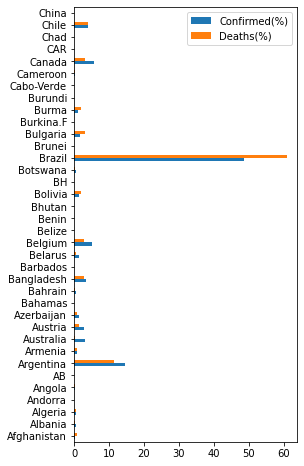

In [ ]:
bar2 = df2.plot.barh(figsize = (4,8))



*   E. Penutup
       

*   negara dengan kasus "confrimed" dan "deaths" terbesar yang dilaporkan pada  tanggal '2021-08-01' adalah US sedangkan pada tanggal  '2022-01-13' adalah brazil. 


